In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
print(cv2.__version__)

4.10.0


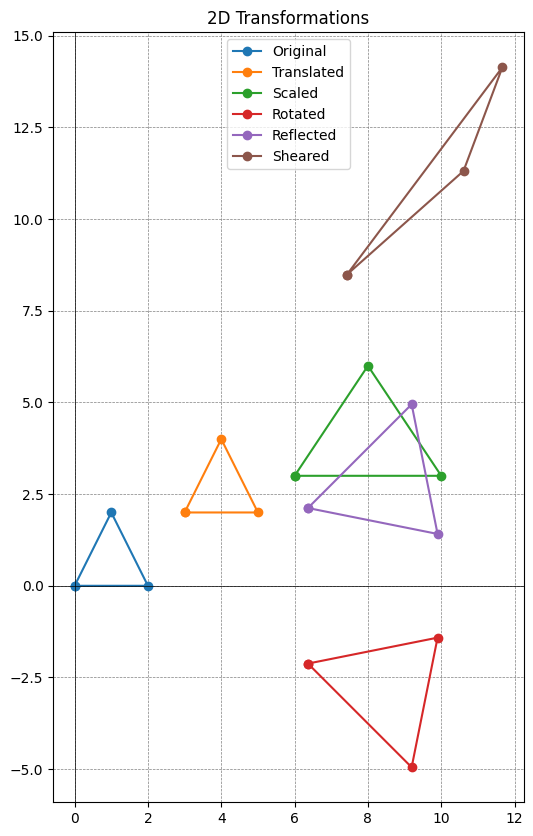

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the 2D object (e.g., a triangle)
object_points = np.array([
    [0, 0],  # Point A
    [2, 0],  # Point B
    [1, 2],  # Point C
    [0, 0]   # Closing the shape
])

# Transformation Functions
def translate(points, tx, ty):
    """Apply translation by (tx, ty)."""
    translation_matrix = np.array([tx, ty])
    return points + translation_matrix

def scale(points, sx, sy):
    """Apply scaling by (sx, sy)."""
    scaling_matrix = np.array([[sx, 0], [0, sy]])
    return np.dot(points, scaling_matrix)

def rotate(points, angle):
    """Apply rotation by 'angle' degrees."""
    angle_rad = np.radians(angle)
    rotation_matrix = np.array([
        [np.cos(angle_rad), -np.sin(angle_rad)],
        [np.sin(angle_rad),  np.cos(angle_rad)]
    ])
    return np.dot(points, rotation_matrix)

def reflect(points, axis):
    """Apply reflection across x-axis, y-axis, or origin."""
    if axis == 'x':
        reflection_matrix = np.array([[1, 0], [0, -1]])
    elif axis == 'y':
        reflection_matrix = np.array([[-1, 0], [0, 1]])
    elif axis == 'origin':
        reflection_matrix = np.array([[-1, 0], [0, -1]])
    else:
        raise ValueError("Invalid axis. Choose from 'x', 'y', or 'origin'.")
    return np.dot(points, reflection_matrix)

def shear(points, shx, shy):
    """Apply shearing with factors (shx, shy)."""
    shearing_matrix = np.array([[1, shx], [shy, 1]])
    return np.dot(points, shearing_matrix)

# def composite_transform(points, transformations):
#     """Apply a series of transformations in order."""
#     result = points
#     for transform, args in transformations:
#         result = transform(result, *args)
#     return result

# Example Transformations
translated_points = translate(object_points, 3, 2)
scaled_points = scale(translated_points, 2, 1.5)
rotated_points = rotate(scaled_points, 45)
reflected_points = reflect(rotated_points, axis='x')
sheared_points = shear(reflected_points, shx=1, shy=0.5)

# # Composite Transformation: Translate -> Scale -> Rotate
# composite_points = composite_transform(object_points, [
#     (translate, (2, 1)),
#     (scale, (1.5, 1.5)),
#     (rotate, (30,))


# Plot the transformations
plt.figure(figsize=(10, 10))

# Original Object
plt.plot(object_points[:, 0], object_points[:, 1], label='Original', marker='o')

# Individual Transformations
plt.plot(translated_points[:, 0], translated_points[:, 1], label='Translated', marker='o')
plt.plot(scaled_points[:, 0], scaled_points[:, 1], label='Scaled', marker='o')
plt.plot(rotated_points[:, 0], rotated_points[:, 1], label='Rotated', marker='o')
plt.plot(reflected_points[:, 0], reflected_points[:, 1], label='Reflected', marker='o')
plt.plot(sheared_points[:, 0], sheared_points[:, 1], label='Sheared', marker='o')

# Composite Transformation
# plt.plot(composite_points[:, 0], composite_points[:, 1], label='Composite', marker='o', linestyle='--')

# Add grid and labels
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.legend()
plt.title("2D Transformations")
plt.gca().set_aspect('equal', adjustable='box')
plt.show()